In [ ]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

In [ ]:
# Import training and testing data
X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter= None)
Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
np.random.seed(0)

In [ ]:
# Explore the data
print(X.shape, ', ', Y.shape, ', ',Xte.shape)

(7423, 107) ,  (7423,) ,  (7422, 107)


In [ ]:
print(np.unique(Y)) # 2 classes
print(np.sum(Y), len(Y))

[0. 1.]
3671.0 7423


In [ ]:
# Split data into training and validation and randomly shuffle the order of data
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xtr, Ytr = ml.shuffleData(Xtr, Ytr)

# Taking a subsample of the data so that trains faster.  You should train on whole data for homework and Kaggle.
Xt, Yt = Xtr[:4000], Ytr[:4000]

In [ ]:
# Scaling the data
XtrP, params = ml.rescale(Xt)
XvaP,_    = ml.rescale(Xva, params)
XteP,_    = ml.rescale(Xte, params)

In [ ]:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep= 0.1, stopTol=1e-6, stopIter=1000)

/Users/lynnpham/Documents/School Work/CS 178/Final project/mltools/base.py:97: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/Users/lynnpham/Documents/School Work/CS 178/Final project/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )


In [ ]:
print("Training error: ", learner.err(XtrP, Yt))
print("validation error: ", learner.err(XvaP, Yva))

Training error:  0.379
validation error:  0.39057239057239057


In [ ]:
print("{0:>15}: {1:.4f}".format('Train AUC',learner.auc(XtrP, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', learner.auc(Xva, Yva)))

      Train AUC: 0.6715
 Validation AUC: 0.5087


/Users/lynnpham/Documents/School Work/CS 178/Final project/mltools/linearC.py:82: RuntimeWarning: overflow encountered in exp
  prob = np.exp(resp)
/Users/lynnpham/Documents/School Work/CS 178/Final project/mltools/linearC.py:84: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob + 1.0       # logistic transform (binary classification; C=1)


# Loop to find best initStep and stopIter

In [ ]:
probs = learner.predictSoft(XteP)

In [ ]:
probs

array([[0.65245379, 0.34754621],
       [0.73130572, 0.26869428],
       [0.40623212, 0.59376788],
       ...,
       [0.46122651, 0.53877349],
       [0.23609931, 0.76390069],
       [0.66409821, 0.33590179]])

In [ ]:
Y_sub = np.vstack([np.arange(Xte.shape[0]), probs[:, 1]]).T
np.savetxt('Y_sub.txt', Y_sub, '%d, %.5f', header='ID,Predicted', comments='', delimiter=',')

In [ ]:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep= 0.5, stopTol=1e-6, stopIter=200)

print("Training error: ", learner.err(XtrP, Yt))
print("validation error: ", learner.err(XvaP, Yva))

/Users/lynnpham/Desktop/CS 178/Final project/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )


Training error:  0.39275
validation error:  0.4


In [ ]:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep= 0.5, stopTol=1e-6, stopIter=1000)

print("Training error: ", learner.err(XtrP, Yt))
print("validation error: ", learner.err(XvaP, Yva))

Training error:  0.37775
validation error:  0.3925925925925926


In [ ]:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep= 0.5, stopTol=1e-6, stopIter=1500)

print("Training error: ", learner.err(XtrP, Yt))
print("validation error: ", learner.err(XvaP, Yva))

Training error:  0.381
validation error:  0.4006734006734007


In [ ]:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep= 0.5, stopTol=1e-6, stopIter=1000)

print("Training error: ", learner.err(XtrP, Yt))
print("validation error: ", learner.err(XvaP, Yva))
print("{0:>15}: {1:.4f}".format('Train AUC',learner.auc(XtrP, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', learner.auc(Xva, Yva)))

/Users/lynnpham/Desktop/CS 178/Final project/mltools/base.py:97: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/Users/lynnpham/Desktop/CS 178/Final project/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )


Training error:  0.37825
validation error:  0.3925925925925926
      Train AUC: 0.6772
 Validation AUC: 0.5085


In [ ]:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep= 0.1, stopTol=1e-6, stopIter=1000)

print("Training error: ", learner.err(XtrP, Yt))
print("validation error: ", learner.err(XvaP, Yva))
print("{0:>15}: {1:.4f}".format('Train AUC',learner.auc(XtrP, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', learner.auc(Xva, Yva)))

Training error:  0.3775
validation error:  0.39595959595959596
      Train AUC: 0.6790
 Validation AUC: 0.5085


In [ ]:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep= 0, stopTol=1e-6, stopIter=1000)

print("Training error: ", learner.err(XtrP, Yt))
print("validation error: ", learner.err(XvaP, Yva))
print("{0:>15}: {1:.4f}".format('Train AUC',learner.auc(XtrP, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', learner.auc(Xva, Yva)))

Training error:  0.50125
validation error:  0.5057239057239057
      Train AUC: 0.4952
 Validation AUC: 0.4919


In [ ]:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep= 0.3, stopTol=1e-6, stopIter=1000)

print("Training error: ", learner.err(XtrP, Yt))
print("validation error: ", learner.err(XvaP, Yva))
print("{0:>15}: {1:.4f}".format('Train AUC',learner.auc(XtrP, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', learner.auc(Xva, Yva)))

Training error:  0.37975
validation error:  0.4
      Train AUC: 0.6787
 Validation AUC: 0.5092


In [ ]:
tr_err = np.array([0.50125, 0.3775, 0.3775, 0.37975, 0.37825])
va_err = np.array([0.50572, 0.3959, 0.3939, 0.4, 0.39259])
init = np.array([0, 0.1, 0.2, 0.3, 0.5])

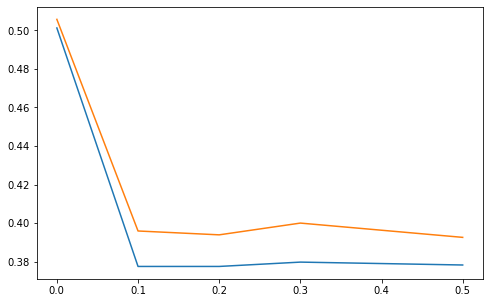

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(init, tr_err)
ax.plot(init, va_err)

In [ ]:
?ml.rescale

In [ ]:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep= 0, stopTol=1e-6, stopIter=1000)

print("Training error: ", learner.err(XtrP, Yt))
print("validation error: ", learner.err(XvaP, Yva))
print("{0:>15}: {1:.4f}".format('Train AUC',learner.auc(XtrP, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', learner.auc(Xva, Yva)))